In [1]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import dtale
from scipy.stats import zscore


## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [3]:
Comp = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/train.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [4]:
pd.set_option('display.max_columns', None)
Comp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
Comp.shape

(1460, 81)

In [6]:
# dtale.show(Comp)

In [7]:
Comp['Condition1'].unique()

array(['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'], dtype=object)

## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data.

In [8]:
Comp.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
Comp['PoolQC'].value_counts()

,count
PoolQC,
Gd,3
Ex,2
Fa,2


In [10]:
Comp['SalePrice'].max()

755000

In [11]:
Comp['SalePrice'].min()

34900

In [12]:
Comp['YearRemodAdd'].max()

2010

In [13]:
Comp['YearRemodAdd'].min()

1950

In [14]:
Comp['YearBuilt'].max()

2010

In [15]:
Comp['YearBuilt'].min()

1872

In [16]:
Comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [17]:
Comp.describe(include="number")

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
Comp.describe(include="object")

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,588,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,3,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,445,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable.


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

In [19]:
# The dataset was sourced from Kaggle (https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data)

#### 2. Timeliness:
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

In [20]:
# last update not specifed

#### 3. Consistency:

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


In [21]:
# The use of a single dataset guarantees consistency from the outset

#### 4. Relevance:
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [22]:
Comp.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


In [23]:
Comp['PoolQC'].unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

#### 5. Uniqueness:
Check for and remove duplicate records to prevent skewed analysis results.


In [24]:
Comp[Comp.duplicated(keep=False)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [25]:
# Comp.drop("Id",axis=1)[Comp.duplicated(keep=False)]

In [26]:
# go to delete duplicates columns

#### 6. Completeness:
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [27]:
import pandas as pd

# Calculate null counts and convert to DataFrame
null_counts = Comp.isnull().sum().sort_values(ascending=False)

# Convert to DataFrame with column names
null_df = pd.DataFrame(null_counts, columns=['Null_Counts'])
null_df.head(20)

,Null_Counts
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81


In [28]:
# go to clean them

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [29]:
Comp.dtypes

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
...,...
MoSold,int64
YrSold,int64
SaleType,object
SaleCondition,object


In [30]:
# go to clean them

In [31]:
# check outliers

**What is an Outlier?**
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR

![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


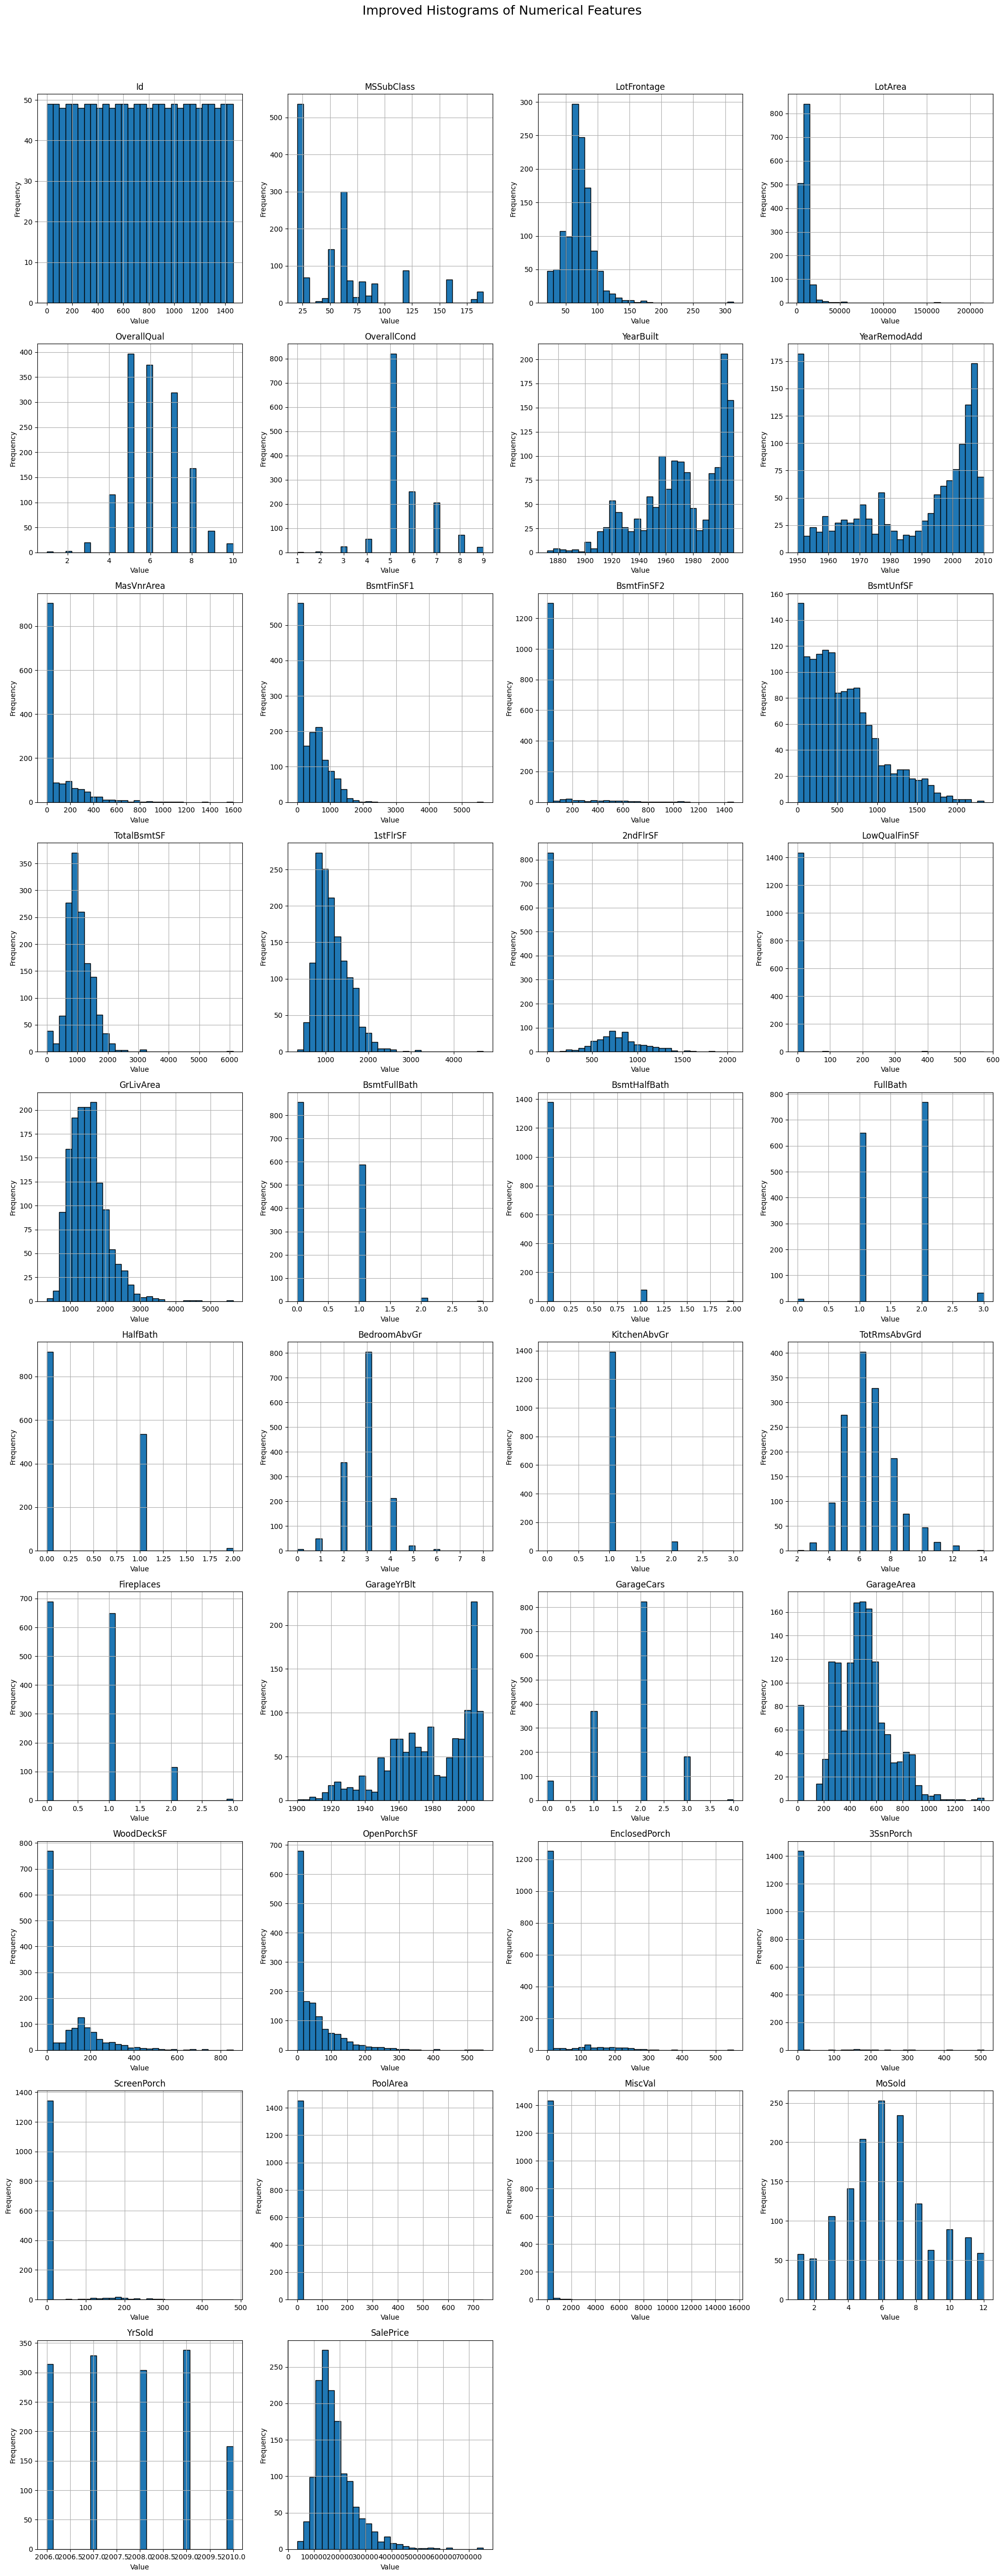

In [32]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = Comp.select_dtypes(include=['number']).columns

# Define number of rows and columns for subplots
n_cols = 4  # Number of columns per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Auto-adjust rows

# Set figure size for better readability
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()  # Flatten in case of a single row

# Plot histograms for each numerical column
for i, col in enumerate(numerical_cols):
    Comp[col].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Frequency")

# Remove extra subplots (if any)
for i in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[i])

# Set title for the entire figure
fig.suptitle('Improved Histograms of Numerical Features', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


In [33]:
Comp.describe()['SalePrice']

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [34]:
Comp.describe()['LotFrontage']

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


In [35]:
Comp['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [36]:
Comp['LotFrontage'].quantile(0.95)

107.0

In [37]:
numairc_coulmns=[]
for col in Comp.select_dtypes(include=['number']).columns:
    numairc_coulmns.append(col)

print(numairc_coulmns)

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


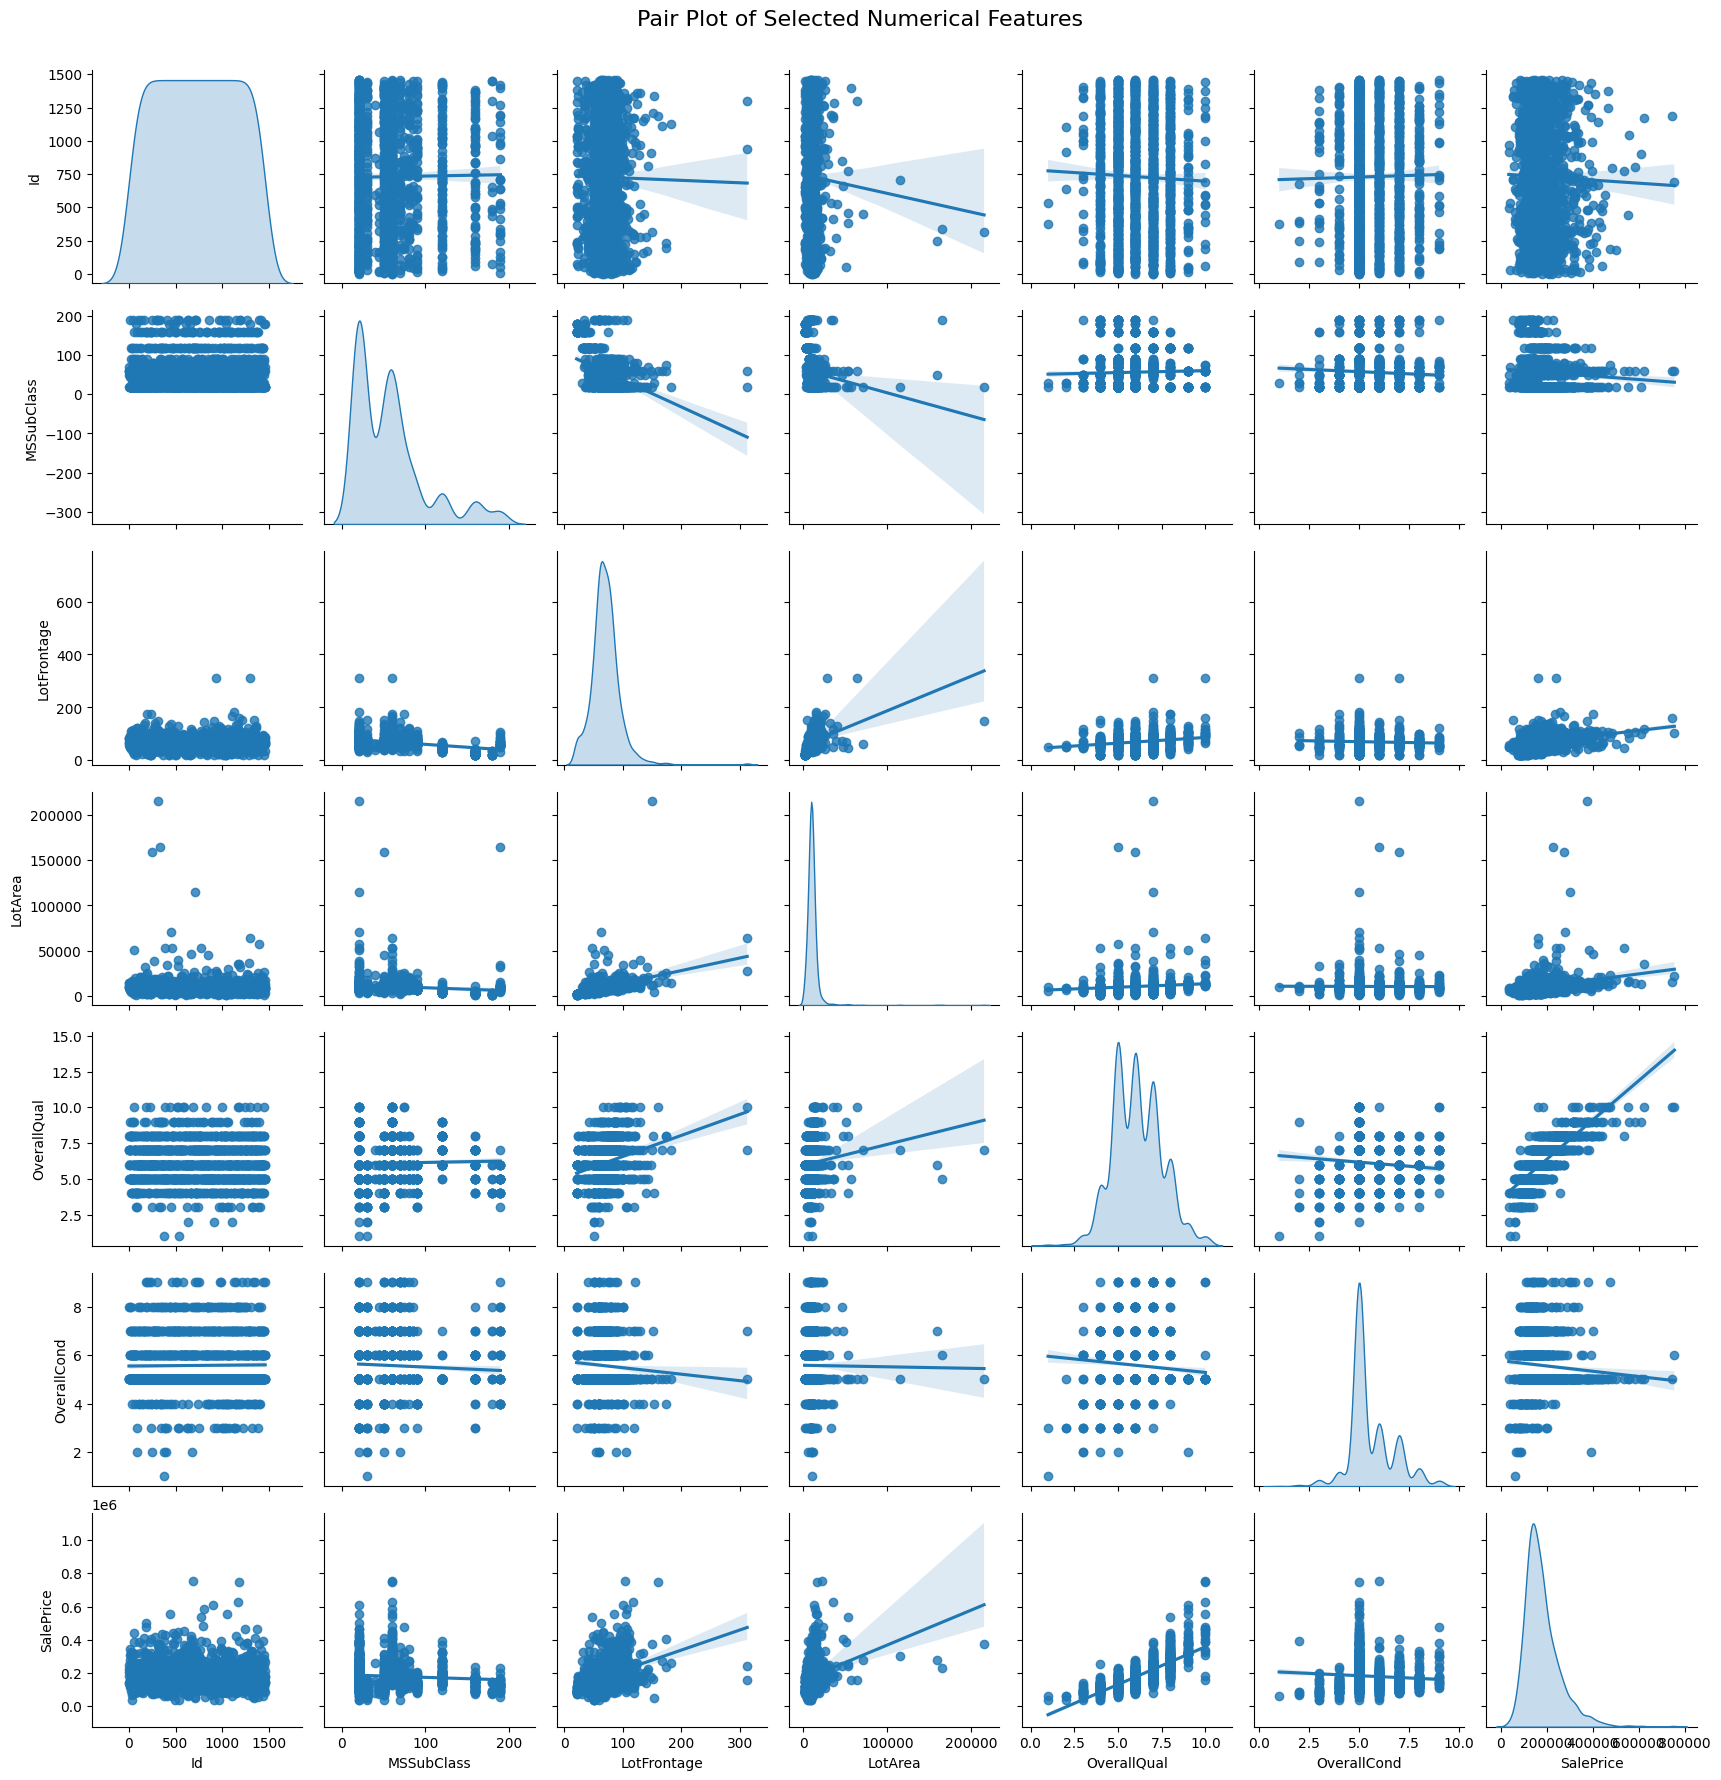

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
selected_numeric_columns = numairc_coulmns[:6]
selected_numeric_columns.append("SalePrice")
df_cleaned = Comp[selected_numeric_columns]

# Generate pair plot
sns.pairplot(df_cleaned, diag_kind="kde",kind="reg")
plt.suptitle("Pair Plot of Selected Numerical Features", y=1.02, fontsize=16)
plt.show()

In [39]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [40]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics

In [41]:
# go to delete ouliers

## 2. Data Cleaning:

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [42]:
Comp['PoolQC'].fillna('No pool',inplace=True)
Comp['MiscFeature'].fillna('No Additional Features',inplace=True)
Comp['Alley'].fillna('No Alley access',inplace=True)
Comp['Fence'].fillna('No fence',inplace=True)
Comp['MasVnrType'].fillna('No Masonry vnr',inplace=True)
Comp['FireplaceQu'].fillna('No Fireplace Quality',inplace=True)
Comp['LotFrontage'].fillna(0.0,inplace=True)
Comp['Electrical'].fillna("Unknown",inplace=True)
Comp['MasVnrArea'].fillna(0.0,inplace=True)
Comp['BsmtQual'].fillna("Unknown",inplace=True)
Comp['BsmtCond'].fillna("Unknown",inplace=True)
Comp['BsmtFinType1'].fillna("Unknown",inplace=True)
Comp['BsmtFinType2'].fillna("Unknown",inplace=True)
Comp['BsmtExposure'].fillna("Unknown",inplace=True)
Comp['GarageCond'].fillna("Unknown",inplace=True)
Comp['GarageQual'].fillna("Unknown",inplace=True)
Comp['GarageFinish'].fillna("Unknown",inplace=True)
Comp['GarageType'].fillna("Unknown",inplace=True)
Comp['GarageYrBlt'].fillna(0.0,inplace=True)

<ipython-input-42-d53ef26e5e93>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Comp['PoolQC'].fillna('No pool',inplace=True)
<ipython-input-42-d53ef26e5e93>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using '

In [43]:
Comp[Comp['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']]

,MasVnrArea,MasVnrType


In [44]:
import pandas as pd

# Calculate null counts and convert to DataFrame
null_counts = Comp.isnull().sum().sort_values(ascending=False)

# Convert to DataFrame with column names
null_df = pd.DataFrame(null_counts, columns=['Null_Counts'])
null_df.head(20)

,Null_Counts
Id,0
CentralAir,0
GarageYrBlt,0
GarageType,0
FireplaceQu,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0


In [45]:
# Apply filters to remove outliers
filtered_df = Comp[
    (Comp["LotFrontage"] < 150) &
    (Comp["LotArea"] < 40000) &
    (Comp["YearBuilt"] > 1900) &
    (Comp["MasVnrArea"] < 700) &
    (Comp["BsmtFinSF1"] < 2000) &
    (Comp["BsmtFinSF2"] < 800) &
    (Comp["TotalBsmtSF"] < 3000) &
    (Comp["1stFlrSF"] < 3000) &
    (Comp["2ndFlrSF"] < 1500) &
    (Comp["GrLivArea"] < 3500) &
    (Comp["WoodDeckSF"] < 600) &
    (Comp["OpenPorchSF"] < 300) &
    (Comp["SalePrice"] < 370000)
]

# Get the shape of the filtered dataset
filtered_shape = filtered_df.shape

# Print the shape
print("Shape of the filtered dataset:", filtered_shape)

Shape of the filtered dataset: (1329, 81)


In [46]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [47]:
# go back to 7th dimension Accuracy

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


## 3. Univariate Analysis:

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

### 2. Univariate Non-Graphical analysis:

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart|


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

**Categorical & numerical --> (scatter plot, histogram, box plot)**

**numerical & numerical --> (Scatter plot, line chart)**

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

# make the model

In [48]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.4/201.4 MB 2.0 MB/s eta 0:00:00


In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer


In [50]:
nominal_features = [
    "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
    "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
    "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition","LandSlope"
]

In [51]:
ordinal_features = [
    "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
    "GarageCond", "PavedDrive", "PoolQC", "Fence"
]


In [52]:
filtered_df["LandSlope"].unique()

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [53]:
df_model = pd.get_dummies(filtered_df, columns=nominal_features, drop_first=True)


In [54]:
label_encoders = {}  # Store label encoders for inverse transformation if needed
for col in ordinal_features:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))  # Convert NaN to string before encoding
    label_encoders[col] = le


In [55]:
df_model.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No Alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_No Masonry vnr,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_Unknown,MiscFeature_No Additional Features,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,LandSlope_Mod,LandSlope_Sev
0,1,60,65.0,8450,7,4,2003,2003,196.0,2,4,2,3,3,2,706,5,0,150,856,0,4,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,2,4,0,2,2008,208500,False,False,True,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,T

In [56]:
Comp.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,No Alley access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace Quality,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No pool,No fence,No Additional Features,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,No Alley access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,No Masonry vnr,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No pool,No fence,No Additional Features,0,5,2007,WD,Normal,181500


In [57]:
correlation= df_model.corr()
print(correlation["SalePrice"].sort_values(ascending=False))

SalePrice       1.000000
OverallQual     0.767356
GrLivArea       0.716022
GarageCars      0.634142
GarageArea      0.614682
                  ...   
HeatingQC      -0.414337
KitchenQual    -0.519105
ExterQual      -0.574039
GarageFinish   -0.576769
BsmtQual       -0.584212
Name: SalePrice, Length: 200, dtype: float64


In [58]:
# Set the correlation threshold
threshold = 0.3

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = correlation[abs(correlation['SalePrice']) > threshold]['SalePrice'].index
selected_features

Index(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinSF1', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice', 'MSZoning_RM',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_No Masonry vnr', 'MasVnrType_Stone', 'Foundation_CBlock',
       'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd'],
      dtype='object')

In [59]:
df_model.drop(columns=['Id'], inplace=True)


In [60]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR()
}

In [61]:
target = "SalePrice"


In [62]:
X = df_model.drop(columns=[target])
y = df_model[target]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [64]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_absolute_error, r2_score

# # Drop unnecessary columns (if needed)
# df_model.drop(columns=['Id'], inplace=True, errors='ignore')

# # Define categorical feature groups
# nominal_features = [
#     "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#     "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#     "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#     "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition","LandSlope"
# ]
# ordinal_features = [
#     "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#     "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#     "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#     "GarageCond", "PavedDrive", "PoolQC", "Fence"
# ]

# # One-Hot Encoding for nominal features
# df_model = pd.get_dummies(filtered_df, columns=nominal_features, drop_first=True)

# # Label Encoding for ordinal features
# label_encoders = {}
# for col in ordinal_features:
#     le = LabelEncoder()
#     df_model[col] = le.fit_transform(df_model[col].astype(str))  # Convert NaN to string before encoding
#     label_encoders[col] = le

# # Compute feature correlations with SalePrice
# correlation = df_model.corr()
# print(correlation["SalePrice"].sort_values(ascending=False))

# # Set correlation threshold for feature selection
# threshold = 0.3
# selected_features = correlation[abs(correlation['SalePrice']) > threshold]['SalePrice'].index.tolist()

# # Ensure SalePrice is included
# if "SalePrice" in selected_features:
#     selected_features.remove("SalePrice")

# # Define input (X) and target (y)
# X = df_model[selected_features]
# y = df_model["SalePrice"]

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define models to train
# models = {
#     "Linear Regression": LinearRegression(),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
#     "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
#     "Support Vector Regressor": SVR()
# }

# # Define hyperparameter grids for tuning
# param_grid = {
#     "Random Forest": {
#         "n_estimators": [50, 100, 200],
#         "max_depth": [None, 10, 20],
#         "min_samples_split": [2, 5, 10]
#     },
#     "Gradient Boosting": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 0.2],
#         "max_depth": [3, 5, 10]
#     },
#     "XGBoost": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 0.2],
#         "max_depth": [3, 5, 10]
#     }
# }

# # Track best model
# best_model = None
# best_score = -np.inf

# # Train and evaluate models
# for name, model in models.items():
#     print(f"Training {name}...")

#     # Scaling is required for SVR and Linear Regression
#     if name in ["Support Vector Regressor", "Linear Regression"]:
#         pipeline = make_pipeline(StandardScaler(), model)
#     else:
#         pipeline = model  # No scaling for tree-based models

#     # If the model is in param_grid, perform GridSearchCV
#     if name in param_grid:
#         grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
#         grid_search.fit(X_train, y_train)
#         best_pipeline = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_cv_score = grid_search.best_score_

#         print(f"Best params for {name}: {best_params}")
#         print(f"Best CV R² Score: {best_cv_score:.4f}\n")
#     else:
#         scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
#         best_cv_score = np.mean(scores)
#         best_pipeline = pipeline
#         print(f"{name}: Mean R² Score = {best_cv_score:.4f}")

#     # Track best model
#     if best_cv_score > best_score:
#         best_score = best_cv_score
#         best_model = best_pipeline

# # Train best model on full training set
# print(f"\nBest Model: {best_model} with R² Score = {best_score:.4f}")
# best_model.fit(X_train, y_train)

# # Evaluate best model on test set
# test_score = best_model.score(X_test, y_test)
# print(f"Test R² Score of Best Model: {test_score:.4f}")


In [65]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.pipeline import make_pipeline
# from sklearn.metrics import mean_absolute_error, r2_score

# # Drop unnecessary columns (if needed)
# df_model.drop(columns=['Id'], inplace=True, errors='ignore')

# # Define categorical feature groups
# nominal_features = [
#     "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#     "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#     "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#     "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition", "LandSlope"
# ]
# ordinal_features = [
#     "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#     "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#     "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#     "GarageCond", "PavedDrive", "PoolQC", "Fence"
# ]

# # One-Hot Encoding for nominal features
# df_model = pd.get_dummies(filtered_df, columns=nominal_features, drop_first=True)

# # Label Encoding for ordinal features
# label_encoders = {}
# for col in ordinal_features:
#     le = LabelEncoder()
#     df_model[col] = le.fit_transform(df_model[col].astype(str))  # Convert NaN to string before encoding
#     label_encoders[col] = le

# # Compute feature correlations with SalePrice
# correlation = df_model.corr()
# print(correlation["SalePrice"].sort_values(ascending=False))

# # Set correlation threshold for feature selection
# threshold = 0.1
# selected_features = correlation[abs(correlation['SalePrice']) > threshold]['SalePrice'].index.tolist()

# # Ensure SalePrice is removed from feature list
# if "SalePrice" in selected_features:
#     selected_features.remove("SalePrice")

# # Define input (X) and target (y)
# X = df_model[selected_features]
# y = df_model["SalePrice"]

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define models to train
# models = {
#     "Linear Regression": LinearRegression(),
#     "Lasso Regression": Lasso(alpha=0.1),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
#     "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
#     "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
#     "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42),
#     "Support Vector Regressor": SVR()
# }

# # Define hyperparameter grids for tuning
# param_grid = {
#     "Random Forest": {
#         "n_estimators": [50, 100, 200],
#         "max_depth": [None, 10, 20],
#         "min_samples_split": [2, 5, 10]
#     },
#     "Gradient Boosting": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 0.2],
#         "max_depth": [3, 5, 10]
#     },
#     "XGBoost": {
#         "n_estimators": [50, 100, 200],
#         "learning_rate": [0.01, 0.1, 0.2],
#         "max_depth": [3, 5, 10]
#     }
# }

# # Track best model
# best_model = None
# best_score = -np.inf

# # Train and evaluate models
# results = []

# for name, model in models.items():
#     print(f"Training {name}...")

#     # Scaling is required for SVR, KNN, Lasso, Ridge, ElasticNet, and Linear Regression
#     if name in ["Support Vector Regressor", "Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net", "KNN Regressor"]:
#         pipeline = make_pipeline(StandardScaler(), model)
#     else:
#         pipeline = model  # No scaling for tree-based models

#     # If the model is in param_grid, perform GridSearchCV
#     if name in param_grid:
#         grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
#         grid_search.fit(X_train, y_train)
#         best_pipeline = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_cv_score = grid_search.best_score_

#         print(f"Best params for {name}: {best_params}")
#         print(f"Best CV R² Score: {best_cv_score:.4f}\n")
#     else:
#         r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
#         best_cv_score = np.mean(r2_scores)

#         # Compute mean absolute error (MAE) with cross-validation
#         mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         mean_cv_mae = -np.mean(mae_scores)  # Convert to positive values

#         best_pipeline = pipeline
#         print(f"{name}: Mean R² Score = {best_cv_score:.4f}, Mean MAE = {mean_cv_mae:.4f}")

#     # Train best model on full training set
#     best_pipeline.fit(X_train, y_train)

#     # Evaluate on test set
#     y_pred = best_pipeline.predict(X_test)
#     test_r2 = r2_score(y_test, y_pred)
#     test_mae = mean_absolute_error(y_test, y_pred)

#     results.append({
#         "Model": name,
#         "CV R²": best_cv_score,
#         "CV MAE": mean_cv_mae,
#         "Test R²": test_r2,
#         "Test MAE": test_mae
#     })

#     # Track best model based on cross-validation R²
#     if best_cv_score > best_score:
#         best_score = best_cv_score
#         best_model = best_pipeline

# # Convert results to DataFrame
# results_df = pd.DataFrame(results).sort_values(by="CV R²", ascending=False)

# print(f"\nBest Model: {best_model} with CV R² Score = {best_score:.4f}")


In [66]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.base import BaseEstimator, TransformerMixin

# # --- Custom Transformer for Correlation-Based Feature Selection ---
# class CorrelationSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=0.1):
#         self.threshold = threshold

#     def fit(self, X, y):
#         # Assuming X is a DataFrame, add target to compute correlation
#         df = X.copy()
#         df['SalePrice'] = y
#         correlation = df.corr()
#         # Select features with absolute correlation above the threshold
#         self.selected_features_ = correlation[abs(correlation['SalePrice']) > self.threshold]['SalePrice'].index.tolist()
#         # Remove the target column if present
#         if 'SalePrice' in self.selected_features_:
#             self.selected_features_.remove('SalePrice')
#         return self

#     def transform(self, X):
#         return X[self.selected_features_]

# # --- Data Preprocessing ---
# # Drop unnecessary columns (if needed)
# df_model.drop(columns=['Id'], inplace=True, errors='ignore')

# # Define categorical feature groups
# nominal_features = [
#     "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#     "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#     "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#     "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition", "LandSlope"
# ]
# ordinal_features = [
#     "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#     "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#     "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#     "GarageCond", "PavedDrive", "PoolQC", "Fence"
# ]

# # One-Hot Encoding for nominal features
# df_model = pd.get_dummies(filtered_df, columns=nominal_features, drop_first=True)

# # Label Encoding for ordinal features
# label_encoders = {}
# for col in ordinal_features:
#     le = LabelEncoder()
#     df_model[col] = le.fit_transform(df_model[col].astype(str))  # Convert NaN to string before encoding
#     label_encoders[col] = le

# # Define input (X) and target (y)
# X = df_model.drop(columns=['SalePrice'])
# y = df_model["SalePrice"]

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- Define Models and Hyperparameter Grids ---
# models = {
#     "Linear Regression": LinearRegression(),
#     "Lasso Regression": Lasso(alpha=0.1),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
#     "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Extra Trees": ExtraTreesRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
#     "Support Vector Regressor": SVR()
# }

# # For demonstration, we add threshold tuning only for models with grid search.
# param_grid = {
#     "Random Forest": {
#         "corr_selector__threshold": [0.0, 0.05, 0.1, 0.15, 0.2],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__max_depth": [None, 10, 20],
#         "estimator__min_samples_split": [2, 5, 10]
#     },
#     "Gradient Boosting": {
#         "corr_selector__threshold": [0.0, 0.05, 0.1, 0.15, 0.2],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__learning_rate": [0.01, 0.1, 0.2],
#         "estimator__max_depth": [3, 5, 10]
#     },
#     "XGBoost": {
#         "corr_selector__threshold": [0.0, 0.05, 0.1, 0.15, 0.2],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__learning_rate": [0.01, 0.1, 0.2],
#         "estimator__max_depth": [3, 5, 10]
#     }
# }

# # --- Model Training and Evaluation ---
# best_model = None
# best_score = -np.inf
# results = []

# for name, model in models.items():
#     print(f"Training {name}...")

#     # Build pipeline with the CorrelationSelector as the first step.
#     # For models that require scaling, add StandardScaler.
#     if name in ["Support Vector Regressor", "Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net", "KNN Regressor"]:
#         pipeline = Pipeline([
#             ('corr_selector', CorrelationSelector(threshold=0.1)),  # default threshold; will be tuned if applicable
#             ('scaler', StandardScaler()),
#             ('estimator', model)
#         ])
#     else:
#         pipeline = Pipeline([
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('estimator', model)
#         ])

#     # If the model is set up for grid search, tune the correlation threshold along with other hyperparameters.
#     if name in param_grid:
#         grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
#         grid_search.fit(X_train, y_train)
#         best_pipeline = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_cv_r2 = grid_search.best_score_
#         # Compute average CV MAE for the best pipeline
#         mae_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         best_cv_mae = -np.mean(mae_scores)

#         print(f"Best params for {name}: {best_params}")
#         print(f"Best CV R² Score: {best_cv_r2:.4f}")
#         print(f"Best CV MAE: {best_cv_mae:.4f}\n")
#     else:
#         # For models without grid search, use the default threshold of 0.1
#         r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
#         mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         best_cv_r2 = np.mean(r2_scores)
#         best_cv_mae = -np.mean(mae_scores)
#         best_pipeline = pipeline
#         print(f"{name}: Mean CV R² Score = {best_cv_r2:.4f}, Mean CV MAE = {best_cv_mae:.4f}")

#     # Train the best pipeline on the full training set
#     best_pipeline.fit(X_train, y_train)

#     # Evaluate on the test set
#     y_pred = best_pipeline.predict(X_test)
#     test_r2 = r2_score(y_test, y_pred)
#     test_mae = mean_absolute_error(y_test, y_pred)

#     results.append({
#         "Model": name,
#         "CV R²": best_cv_r2,
#         "CV MAE": best_cv_mae,
#         "Test R²": test_r2,
#         "Test MAE": test_mae
#     })

#     # Track best model based on CV R²
#     if best_cv_r2 > best_score:
#         best_score = best_cv_r2
#         best_model = best_pipeline

# # Convert results to DataFrame and display
# results_df = pd.DataFrame(results).sort_values(by="CV R²", ascending=False)
# print(results_df)
# print(f"\nBest Model: {best_model} with CV R² Score = {best_score:.4f}")

In [67]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.base import BaseEstimator, TransformerMixin

# # --- Custom Transformer for Correlation-Based Feature Selection ---
# class CorrelationSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=0.1):
#         self.threshold = threshold

#     def fit(self, X, y):
#         # Assuming X is a DataFrame, add target to compute correlation
#         df = X.copy()
#         df['SalePrice'] = y
#         correlation = df.corr()
#         # Select features with absolute correlation above the threshold
#         self.selected_features_ = correlation[abs(correlation['SalePrice']) > self.threshold]['SalePrice'].index.tolist()
#         # Remove the target column if present
#         if 'SalePrice' in self.selected_features_:
#             self.selected_features_.remove('SalePrice')
#         return self

#     def transform(self, X):
#         return X[self.selected_features_]

# # --- Data Preprocessing ---
# # Drop unnecessary columns (if needed)
# df_model.drop(columns=['Id'], inplace=True, errors='ignore')

# # Define categorical feature groups
# nominal_features = [
#     "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#     "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#     "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#     "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition", "LandSlope"
# ]
# ordinal_features = [
#     "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#     "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#     "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#     "GarageCond", "PavedDrive", "PoolQC", "Fence"
# ]

# # One-Hot Encoding for nominal features
# df_model = pd.get_dummies(filtered_df, columns=nominal_features, drop_first=True)

# # Label Encoding for ordinal features
# label_encoders = {}
# for col in ordinal_features:
#     le = LabelEncoder()
#     df_model[col] = le.fit_transform(df_model[col].astype(str))  # Convert NaN to string before encoding
#     label_encoders[col] = le

# # Define input (X) and target (y)
# X = df_model.drop(columns=['SalePrice'])
# y = df_model["SalePrice"]

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- Define Models and Hyperparameter Grids ---
# models = {
#     "Linear Regression": LinearRegression(),
#     "Lasso Regression": Lasso(alpha=0.1),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
#     "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Extra Trees": ExtraTreesRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
#     "Support Vector Regressor": SVR()
# }

# # For demonstration, we add threshold tuning only for models with grid search.
# param_grid = {
#     "Random Forest": {
#         "corr_selector__threshold": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__max_depth": [None, 10, 20],
#         "estimator__min_samples_split": [2, 5, 10]
#     },
#     "Gradient Boosting": {
#         "corr_selector__threshold": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__learning_rate": [0.01, 0.1, 0.2],
#         "estimator__max_depth": [3, 5, 10]
#     },
#     "XGBoost": {
#         "corr_selector__threshold": [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__learning_rate": [0.01, 0.1, 0.2],
#         "estimator__max_depth": [3, 5, 10]
#     }
# }

# # --- Model Training and Evaluation ---
# best_model = None
# best_score = -np.inf
# results = []

# for name, model in models.items():
#     print(f"Training {name}...")

#     # Build pipeline with the CorrelationSelector as the first step.
#     # For models that require scaling, add StandardScaler.
#     if name in ["Support Vector Regressor", "Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net", "KNN Regressor"]:
#         pipeline = Pipeline([
#             ('corr_selector', CorrelationSelector(threshold=0.1)),  # default threshold; will be tuned if applicable
#             ('scaler', StandardScaler()),
#             ('estimator', model)
#         ])
#     else:
#         pipeline = Pipeline([
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('estimator', model)
#         ])

#     # If the model is set up for grid search, tune the correlation threshold along with other hyperparameters.
#     if name in param_grid:
#         grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
#         grid_search.fit(X_train, y_train)
#         best_pipeline = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_cv_r2 = grid_search.best_score_
#         # Compute average CV MAE for the best pipeline
#         mae_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         best_cv_mae = -np.mean(mae_scores)

#         print(f"Best params for {name}: {best_params}")
#         print(f"Best CV R² Score: {best_cv_r2:.4f}")
#         print(f"Best CV MAE: {best_cv_mae:.4f}\n")
#     else:
#         # For models without grid search, use the default threshold of 0.1
#         r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
#         mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         best_cv_r2 = np.mean(r2_scores)
#         best_cv_mae = -np.mean(mae_scores)
#         best_pipeline = pipeline
#         print(f"{name}: Mean CV R² Score = {best_cv_r2:.4f}, Mean CV MAE = {best_cv_mae:.4f}")

#     # Train the best pipeline on the full training set
#     best_pipeline.fit(X_train, y_train)

#     # Evaluate on the test set
#     y_pred = best_pipeline.predict(X_test)
#     test_r2 = r2_score(y_test, y_pred)
#     test_mae = mean_absolute_error(y_test, y_pred)

#     results.append({
#         "Model": name,
#         "CV R²": best_cv_r2,
#         "CV MAE": best_cv_mae,
#         "Test R²": test_r2,
#         "Test MAE": test_mae
#     })

#     # Track best model based on CV R²
#     if best_cv_r2 > best_score:
#         best_score = best_cv_r2
#         best_model = best_pipeline

# # Convert results to DataFrame and display
# results_df = pd.DataFrame(results).sort_values(by="CV R²", ascending=False)
# print(results_df)
# print(f"\nBest Model: {best_model} with CV R² Score = {best_score:.4f}")

In [68]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.base import BaseEstimator, TransformerMixin

# # --- Custom Transformer for Correlation-Based Feature Selection ---
# class CorrelationSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=0.1):
#         self.threshold = threshold

#     def fit(self, X, y):
#         # Assuming X is a DataFrame, add target to compute correlation
#         df = X.copy()
#         df['SalePrice'] = y
#         correlation = df.corr()
#         # Select features with absolute correlation above the threshold
#         self.selected_features_ = correlation[abs(correlation['SalePrice']) > self.threshold]['SalePrice'].index.tolist()
#         # Remove the target column if present
#         if 'SalePrice' in self.selected_features_:
#             self.selected_features_.remove('SalePrice')
#         return self

#     def transform(self, X):
#         return X[self.selected_features_]

# # --- Data Preprocessing ---
# # Drop unnecessary columns (if needed)
# df_model.drop(columns=['Id'], inplace=True, errors='ignore')

# # Define categorical feature groups
# nominal_features = [
#     "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#     "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#     "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#     "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition", "LandSlope"
# ]
# ordinal_features = [
#     "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#     "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#     "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#     "GarageCond", "PavedDrive", "PoolQC", "Fence"
# ]

# # One-Hot Encoding for nominal features
# df_model = pd.get_dummies(filtered_df, columns=nominal_features, drop_first=True)

# # Label Encoding for ordinal features
# label_encoders = {}
# for col in ordinal_features:
#     le = LabelEncoder()
#     df_model[col] = le.fit_transform(df_model[col].astype(str))  # Convert NaN to string before encoding
#     label_encoders[col] = le

# # Define input (X) and target (y)
# X = df_model.drop(columns=['SalePrice'])
# y = df_model["SalePrice"]

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- Define Models and Hyperparameter Grids ---
# models = {
#     "Linear Regression": LinearRegression(),
#     "Lasso Regression": Lasso(alpha=0.1),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
#     "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Extra Trees": ExtraTreesRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
#     "Support Vector Regressor": SVR()
# }

# # For demonstration, we add threshold tuning only for models with grid search.
# param_grid = {
#     "Random Forest": {
#         "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__max_depth": [None, 10, 20],
#         "estimator__min_samples_split": [2, 5, 10]
#     },
#     "Gradient Boosting": {
#         "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__learning_rate": [0.01, 0.1, 0.2],
#         "estimator__max_depth": [1, 2, 3, 5, 10]
#     },
#     "XGBoost": {
#         "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__learning_rate": [0.01, 0.1, 0.2],
#         "estimator__max_depth": [1, 2, 3, 5, 10]
#     }
# }

# # --- Model Training and Evaluation ---
# best_model = None
# best_score = -np.inf
# results = []

# for name, model in models.items():
#     print(f"Training {name}...")

#     # Build pipeline with the CorrelationSelector as the first step.
#     # For models that require scaling, add StandardScaler.
#     if name in ["Support Vector Regressor", "Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net", "KNN Regressor"]:
#         pipeline = Pipeline([
#             ('corr_selector', CorrelationSelector(threshold=0.1)),  # default threshold; will be tuned if applicable
#             ('scaler', StandardScaler()),
#             ('estimator', model)
#         ])
#     else:
#         pipeline = Pipeline([
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('estimator', model)
#         ])

#     # If the model is set up for grid search, tune the correlation threshold along with other hyperparameters.
#     if name in param_grid:
#         grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
#         grid_search.fit(X_train, y_train)
#         best_pipeline = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_cv_r2 = grid_search.best_score_
#         # Compute average CV MAE for the best pipeline
#         mae_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         best_cv_mae = -np.mean(mae_scores)

#         print(f"Best params for {name}: {best_params}")
#         print(f"Best CV R² Score: {best_cv_r2:.4f}")
#         print(f"Best CV MAE: {best_cv_mae:.4f}\n")
#     else:
#         # For models without grid search, use the default threshold of 0.1
#         r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
#         mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         best_cv_r2 = np.mean(r2_scores)
#         best_cv_mae = -np.mean(mae_scores)
#         best_pipeline = pipeline
#         print(f"{name}: Mean CV R² Score = {best_cv_r2:.4f}, Mean CV MAE = {best_cv_mae:.4f}")

#     # Train the best pipeline on the full training set
#     best_pipeline.fit(X_train, y_train)

#     # Evaluate on the test set
#     y_pred = best_pipeline.predict(X_test)
#     test_r2 = r2_score(y_test, y_pred)
#     test_mae = mean_absolute_error(y_test, y_pred)

#     results.append({
#         "Model": name,
#         "CV R²": best_cv_r2,
#         "CV MAE": best_cv_mae,
#         "Test R²": test_r2,
#         "Test MAE": test_mae
#     })

#     # Track best model based on CV R²
#     if best_cv_r2 > best_score:
#         best_score = best_cv_r2
#         best_model = best_pipeline

# # Convert results to DataFrame and display
# results_df = pd.DataFrame(results).sort_values(by="CV R²", ascending=False)
# print(results_df)
# print(f"\nBest Model: {best_model} with CV R² Score = {best_score:.4f}")

In [69]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.base import BaseEstimator, TransformerMixin

# # --- Custom Transformer for Correlation-Based Feature Selection ---
# class CorrelationSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=0.1):
#         self.threshold = threshold

#     def fit(self, X, y):
#         # Assuming X is a DataFrame, add target to compute correlation
#         df = X.copy()
#         df['SalePrice'] = y
#         correlation = df.corr()
#         # Select features with absolute correlation above the threshold
#         self.selected_features_ = correlation[abs(correlation['SalePrice']) > self.threshold]['SalePrice'].index.tolist()
#         # Remove the target column if present
#         if 'SalePrice' in self.selected_features_:
#             self.selected_features_.remove('SalePrice')
#         return self

#     def transform(self, X):
#         return X[self.selected_features_]

# # --- Data Preprocessing ---
# # Drop unnecessary columns (if needed)
# df_model.drop(columns=['Id'], inplace=True, errors='ignore')

# # Define categorical feature groups
# nominal_features = [
#     "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#     "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#     "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#     "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition", "LandSlope"
# ]
# ordinal_features = [
#     "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#     "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#     "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#     "GarageCond", "PavedDrive", "PoolQC", "Fence"
# ]

# # One-Hot Encoding for nominal features
# df_model = pd.get_dummies(filtered_df, columns=nominal_features, drop_first=True)

# # Label Encoding for ordinal features
# label_encoders = {}
# for col in ordinal_features:
#     le = LabelEncoder()
#     df_model[col] = le.fit_transform(df_model[col].astype(str))  # Convert NaN to string before encoding
#     label_encoders[col] = le

# # Define input (X) and target (y)
# X = df_model.drop(columns=['SalePrice'])
# y = df_model["SalePrice"]

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- Define Models and Hyperparameter Grids ---
# models = {
#     "Linear Regression": LinearRegression(),
#     "Lasso Regression": Lasso(alpha=0.1),
#     "Ridge Regression": Ridge(alpha=1.0),
#     "Elastic Net": ElasticNet(alpha=0.1, l1_ratio=0.5),
#     "KNN Regressor": KNeighborsRegressor(n_neighbors=5),
#     "Decision Tree": DecisionTreeRegressor(random_state=42),
#     "Random Forest": RandomForestRegressor(random_state=42),
#     "Extra Trees": ExtraTreesRegressor(random_state=42),
#     "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#     "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
#     "Support Vector Regressor": SVR()
# }

# # For demonstration, we add threshold tuning only for models with grid search.
# param_grid = {
#     "Random Forest": {
#         "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, .1],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__max_depth": [None, 10, 20],
#         "estimator__min_samples_split": [2, 5, 10]
#     },
#     "Gradient Boosting": {
#         "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, .1],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__learning_rate": [0.01, 0.1, 0.2],
#         "estimator__max_depth": [1, 2, 3, 5, 10]
#     },
#     "XGBoost": {
#         "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, .1],
#         "estimator__n_estimators": [50, 100, 200],
#         "estimator__learning_rate": [0.01, 0.1, 0.2],
#         "estimator__max_depth": [1, 2, 3, 5, 10]
#     }
# }

# # --- Model Training and Evaluation ---
# best_model = None
# best_score = -np.inf
# results = []

# for name, model in models.items():
#     print(f"Training {name}...")

#     # Build pipeline with the CorrelationSelector as the first step.
#     # For models that require scaling, add StandardScaler.
#     if name in ["Support Vector Regressor", "Linear Regression", "Lasso Regression", "Ridge Regression", "Elastic Net", "KNN Regressor"]:
#         pipeline = Pipeline([
#             ('corr_selector', CorrelationSelector(threshold=0.1)),  # default threshold; will be tuned if applicable
#             ('scaler', StandardScaler()),
#             ('estimator', model)
#         ])
#     else:
#         pipeline = Pipeline([
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('estimator', model)
#         ])

#     # If the model is set up for grid search, tune the correlation threshold along with other hyperparameters.
#     if name in param_grid:
#         grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
#         grid_search.fit(X_train, y_train)
#         best_pipeline = grid_search.best_estimator_
#         best_params = grid_search.best_params_
#         best_cv_r2 = grid_search.best_score_
#         # Compute average CV MAE for the best pipeline
#         mae_scores = cross_val_score(best_pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         best_cv_mae = -np.mean(mae_scores)

#         print(f"Best params for {name}: {best_params}")
#         print(f"Best CV R² Score: {best_cv_r2:.4f}")
#         print(f"Best CV MAE: {best_cv_mae:.4f}\n")
#     else:
#         # For models without grid search, use the default threshold of 0.1
#         r2_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='r2')
#         mae_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
#         best_cv_r2 = np.mean(r2_scores)
#         best_cv_mae = -np.mean(mae_scores)
#         best_pipeline = pipeline
#         print(f"{name}: Mean CV R² Score = {best_cv_r2:.4f}, Mean CV MAE = {best_cv_mae:.4f}")

#     # Train the best pipeline on the full training set
#     best_pipeline.fit(X_train, y_train)

#     # Evaluate on the test set
#     y_pred = best_pipeline.predict(X_test)
#     test_r2 = r2_score(y_test, y_pred)
#     test_mae = mean_absolute_error(y_test, y_pred)

#     results.append({
#         "Model": name,
#         "CV R²": best_cv_r2,
#         "CV MAE": best_cv_mae,
#         "Test R²": test_r2,
#         "Test MAE": test_mae
#     })

#     # Track best model based on CV R²
#     if best_cv_r2 > best_score:
#         best_score = best_cv_r2
#         best_model = best_pipeline

# # Convert results to DataFrame and display
# results_df = pd.DataFrame(results).sort_values(by="CV R²", ascending=False)
# print(results_df)
# print(f"\nBest Model: {best_model} with CV R² Score = {best_score:.4f}")

In [70]:
# import pandas as pd
# import numpy as np
# import time
# from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import r2_score, mean_absolute_error
# from sklearn.base import BaseEstimator, TransformerMixin

# # --- Custom Transformer for Correlation-Based Feature Selection ---
# class CorrelationSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=0.1):
#         self.threshold = threshold

#     def fit(self, X, y):
#         # Add target to compute correlation
#         df = X.copy()
#         df['SalePrice'] = y
#         corr_matrix = df.corr()
#         # Select features with absolute correlation above the threshold
#         self.selected_features_ = corr_matrix[abs(corr_matrix['SalePrice']) > self.threshold].index.tolist()
#         if 'SalePrice' in self.selected_features_:
#             self.selected_features_.remove('SalePrice')
#         return self

#     def transform(self, X):
#         return X[self.selected_features_]

# # --- Preprocessing Function ---
# def preprocess_data(df, nominal_features, ordinal_features):
#     df = df.copy()
#     # Drop unnecessary columns if present
#     df.drop(columns=['Id'], inplace=True, errors='ignore')

#     # One-Hot Encoding for nominal features
#     df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

#     # Label Encoding for ordinal features
#     label_encoders = {}
#     for col in ordinal_features:
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col].astype(str))
#         label_encoders[col] = le

#     return df, label_encoders

# # --- Pipeline Constructor ---
# def get_model_pipeline(model, model_name):
#     # For models that require feature scaling
#     if model_name in ["Support Vector Regressor", "Linear Regression", "Lasso Regression",
#                       "Ridge Regression", "Elastic Net", "KNN Regressor"]:
#         steps = [
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('scaler', StandardScaler()),
#             ('estimator', model)
#         ]
#     else:
#         steps = [
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('estimator', model)
#         ]
#     return Pipeline(steps)


# # Define your feature groups
# nominal_features = [
#   "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#   "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#   "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#   "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition", "LandSlope"
# ]
# ordinal_features = [
#   "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#   "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#   "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#   "GarageCond", "PavedDrive", "PoolQC", "Fence"
# ]

# # Assume filtered_df is your input DataFrame with all necessary columns
# df_model, label_encoders = preprocess_data(filtered_df, nominal_features, ordinal_features)

# # Define input (X) and target (y)
# X = df_model.drop(columns=['SalePrice'])
# y = df_model["SalePrice"]

# # Split dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # --- Define Models ---
# models = {
#   "Linear Regression": LinearRegression(),
#   "Lasso Regression": Lasso(),
#   "Ridge Regression": Ridge(),
#   "Elastic Net": ElasticNet(),
#   "KNN Regressor": KNeighborsRegressor(),
#   "Decision Tree": DecisionTreeRegressor(random_state=42),
#   "Random Forest": RandomForestRegressor(random_state=42),
#   "Extra Trees": ExtraTreesRegressor(random_state=42),
#   "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#   "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
#   "Support Vector Regressor": SVR()
# }

# # --- Define Hyperparameter Grids for ALL Models ---
# all_param_grids = {
#   "Linear Regression": {
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Lasso Regression": {
#       "estimator__alpha": [0.001, 0.01, 0.1, 1, 10],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Ridge Regression": {
#       "estimator__alpha": [0.1, 1, 10, 100],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Elastic Net": {
#       "estimator__alpha": [0.001, 0.01, 0.1, 1],
#       "estimator__l1_ratio": [0.2, 0.5, 0.8],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "KNN Regressor": {
#       "estimator__n_neighbors": [3, 5, 7, 9],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Decision Tree": {
#       "estimator__max_depth": [None, 5, 10, 20],
#       "estimator__min_samples_split": [2, 5, 10],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Random Forest": {
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
#       "estimator__n_estimators": [50, 100, 200],
#       "estimator__max_depth": [None, 10, 20],
#       "estimator__min_samples_split": [2, 5, 10]
#   },
#   "Extra Trees": {
#       "corr_selector__threshold": [0.0, 0.05, 0.1],
#       "estimator__n_estimators": [50, 100, 200],
#       "estimator__max_depth": [None, 10, 20]
#   },
#   "Gradient Boosting": {
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
#       "estimator__n_estimators": [50, 100, 200],
#       "estimator__learning_rate": [0.01, 0.1, 0.2],
#       "estimator__max_depth": [1, 2, 3, 5, 10]
#   },
#   "XGBoost": {
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
#       "estimator__n_estimators": [50, 100, 200],
#       "estimator__learning_rate": [0.01, 0.1, 0.2],
#       "estimator__max_depth": [1, 2, 3, 5, 10]
#   },
#   "Support Vector Regressor": {
#       "corr_selector__threshold": [0.0, 0.05, 0.1],
#       "scaler__with_mean": [True, False],  # explore effect of centering
#       "estimator__C": [0.1, 1, 10],
#       "estimator__gamma": ['scale', 'auto'],
#       "estimator__epsilon": [0.01, 0.1, 0.2]
#   }
# }

# best_model = None
# best_score = -np.inf
# results = []

# for name, model in models.items():
#   print(f"\nTraining {name}...")
#   pipeline = get_model_pipeline(model, name)
#   grid = all_param_grids.get(name, {})

#   if grid:  # If grid is non-empty, perform hyperparameter tuning
#       grid_search = GridSearchCV(pipeline, grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
#       start_time = time.time()
#       grid_search.fit(X_train, y_train)
#       elapsed_time = time.time() - start_time

#       best_pipeline = grid_search.best_estimator_
#       best_params = grid_search.best_params_
#       best_cv_r2 = grid_search.best_score_

#       # Evaluate additional metrics using cross_validate
#       cv_results = cross_validate(best_pipeline, X_train, y_train, cv=5,
#                                   scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
#                                   n_jobs=-1)
#       best_cv_mae = -np.mean(cv_results['test_mae'])

#       print(f"Best params for {name}: {best_params}")
#       print(f"CV R² = {best_cv_r2:.4f}, CV MAE = {best_cv_mae:.4f}, Time = {elapsed_time:.2f}s")
#   else:
#       # If no grid, simply evaluate default pipeline via cross-validation
#       cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
#                                   scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
#                                   n_jobs=-1)
#       best_cv_r2 = np.mean(cv_results['test_r2'])
#       best_cv_mae = -np.mean(cv_results['test_mae'])
#       best_pipeline = pipeline
#       best_pipeline.fit(X_train, y_train)
#       print(f"{name}: CV R² = {best_cv_r2:.4f}, CV MAE = {best_cv_mae:.4f}")

#   # Evaluate on test set
#   y_pred = best_pipeline.predict(X_test)
#   test_r2 = r2_score(y_test, y_pred)
#   test_mae = mean_absolute_error(y_test, y_pred)

#   results.append({
#       "Model": name,
#       "CV R²": best_cv_r2,
#       "CV MAE": best_cv_mae,
#       "Test R²": test_r2,
#       "Test MAE": test_mae
#   })

#   # Track best model based on CV R²
#   if best_cv_r2 > best_score:
#       best_score = best_cv_r2
#       best_model = best_pipeline

# results_df = pd.DataFrame(results).sort_values(by="CV R²", ascending=False)
# print("\nModel Performance Summary:")
# print(results_df)
# print(f"\nBest Model:\n{best_model}\nwith CV R² = {best_score:.4f}")

# # Optionally, you might explore ensembling (e.g., stacking) the top few models for further gains.
# # from sklearn.ensemble import StackingRegressor
# # estimators = [(row['Model'], models[row['Model']]) for _, row in results_df.head(3).iterrows()]
# # stack_reg = StackingRegressor(estimators=estimators, final_estimator=Ridge())
# # ... then perform cross-validation on stack_reg, etc.



In [71]:
# import pandas as pd
# import numpy as np
# import time
# from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge
# from sklearn.pipeline import Pipeline
# from sklearn.metrics import r2_score, mean_absolute_error
# from sklearn.base import BaseEstimator, TransformerMixin

# # --- Custom Transformer for Correlation-Based Feature Selection ---
# class CorrelationSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=0.1):
#         self.threshold = threshold

#     def fit(self, X, y):
#         df = X.copy()
#         df['SalePrice'] = y
#         corr_matrix = df.corr()
#         self.selected_features_ = corr_matrix[abs(corr_matrix['SalePrice']) > self.threshold].index.tolist()
#         if 'SalePrice' in self.selected_features_:
#             self.selected_features_.remove('SalePrice')
#         return self

#     def transform(self, X):
#         return X[self.selected_features_]

# # --- Preprocessing Function ---
# def preprocess_data(df, nominal_features, ordinal_features):
#     df = df.copy()
#     df.drop(columns=['Id'], inplace=True, errors='ignore')
#     df = pd.get_dummies(df, columns=nominal_features, drop_first=True)
#     label_encoders = {}
#     for col in ordinal_features:
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col].astype(str))
#         label_encoders[col] = le
#     return df, label_encoders

# # --- Pipeline Constructor ---
# def get_model_pipeline(model, model_name):
#     # For models that require scaling
#     if model_name in ["Linear Regression", "Lasso Regression", "Ridge Regression"]:
#         steps = [
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('scaler', StandardScaler()),
#             ('estimator', model)
#         ]
#     else:
#         steps = [
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('estimator', model)
#         ]
#     return Pipeline(steps)

# # --- Main Function (Training only Linear, Lasso, and Ridge) ---
# def main():
#     # Define your feature groups
#     nominal_features = [
#         "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#         "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#         "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#         "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition", "LandSlope"
#     ]
#     ordinal_features = [
#         "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#         "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#         "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#         "GarageCond", "PavedDrive", "PoolQC", "Fence"
#     ]

#     # Assume filtered_df is your input DataFrame with all necessary columns
#     df_model, label_encoders = preprocess_data(filtered_df, nominal_features, ordinal_features)
#     X = df_model.drop(columns=['SalePrice'])
#     y = df_model["SalePrice"]

#     # Split dataset
#     X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#     # --- Define Models (only the three we want) ---
#     models = {
#         "Linear Regression": LinearRegression(),
#         "Lasso Regression": Lasso(),
#         "Ridge Regression": Ridge()
#     }

#     # --- Define Hyperparameter Grids for the Selected Models ---
#     all_param_grids = {
#         "Linear Regression": {
#             "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
#         },
#         "Lasso Regression": {
#             "estimator__alpha": [0.001, 0.01, 0.1, 1, 10],
#             "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
#         },
#         "Ridge Regression": {
#             "estimator__alpha": [0.1, 1, 10, 100],
#             "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
#         }
#     }

#     best_model = None
#     best_score = -np.inf
#     results = []
#     best_ridge_pipeline = None  # Variable to store the best Ridge Regression pipeline

#     for name, model in models.items():
#         print(f"\nTraining {name}...")
#         pipeline = get_model_pipeline(model, name)
#         grid = all_param_grids.get(name, {})

#         if grid:  # Perform hyperparameter tuning if grid is defined
#             grid_search = GridSearchCV(pipeline, grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)
#             start_time = time.time()
#             grid_search.fit(X_train, y_train)
#             elapsed_time = time.time() - start_time

#             best_pipeline = grid_search.best_estimator_
#             best_cv_r2 = grid_search.best_score_

#             # Evaluate additional metrics using cross_validate
#             cv_results = cross_validate(best_pipeline, X_train, y_train, cv=5,
#                                         scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
#                                         n_jobs=-1)
#             best_cv_mae = -np.mean(cv_results['test_mae'])

#             print(f"Best params for {name}: {grid_search.best_params_}")
#             print(f"CV R² = {best_cv_r2:.4f}, CV MAE = {best_cv_mae:.4f}, Time = {elapsed_time:.2f}s")
#         else:
#             # Use default pipeline if no grid is defined
#             cv_results = cross_validate(pipeline, X_train, y_train, cv=5,
#                                         scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
#                                         n_jobs=-1)
#             best_cv_r2 = np.mean(cv_results['test_r2'])
#             best_cv_mae = -np.mean(cv_results['test_mae'])
#             best_pipeline = pipeline
#             best_pipeline.fit(X_train, y_train)
#             print(f"{name}: CV R² = {best_cv_r2:.4f}, CV MAE = {best_cv_mae:.4f}")

#         # Evaluate on test set
#         y_pred = best_pipeline.predict(X_test)
#         test_r2 = r2_score(y_test, y_pred)
#         test_mae = mean_absolute_error(y_test, y_pred)

#         results.append({
#             "Model": name,
#             "CV R²": best_cv_r2,
#             "CV MAE": best_cv_mae,
#             "Test R²": test_r2,
#             "Test MAE": test_mae
#         })

#         # Track best overall model based on CV R²
#         if best_cv_r2 > best_score:
#             best_score = best_cv_r2
#             best_model = best_pipeline

#         # Save the Ridge Regression pipeline separately
#         if name == "Ridge Regression":
#             best_ridge_pipeline = best_pipeline

#     results_df = pd.DataFrame(results).sort_values(by="CV R²", ascending=False)
#     print("\nModel Performance Summary:")
#     print(results_df)
#     print(f"\nBest Overall Model:\n{best_model}\nwith CV R² = {best_score:.4f}")

#     # Return both the best overall model and the best Ridge Regression pipeline
#     return best_model, best_ridge_pipeline

# if __name__ == '__main__':
#     best_model, best_ridge_pipeline = main()
#     print("\nStored Ridge Regression model pipeline:")
#     print(best_ridge_pipeline)


In [72]:
# import pandas as pd
# import numpy as np
# import time
# from sklearn.model_selection import cross_validate, GridSearchCV
# from sklearn.metrics import r2_score, mean_absolute_error
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
# from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
# from sklearn.svm import SVR
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.neighbors import KNeighborsRegressor
# import xgboost as xgb
# from sklearn.pipeline import Pipeline
# from sklearn.base import BaseEstimator, TransformerMixin

# # --- Custom Transformer for Correlation-Based Feature Selection ---
# class CorrelationSelector(BaseEstimator, TransformerMixin):
#     def __init__(self, threshold=0.1):
#         self.threshold = threshold

#     def fit(self, X, y):
#         df = X.copy()
#         df['SalePrice'] = y
#         corr_matrix = df.corr()
#         # Select features with absolute correlation greater than threshold
#         self.selected_features_ = corr_matrix[abs(corr_matrix['SalePrice']) > self.threshold].index.tolist()
#         if 'SalePrice' in self.selected_features_:
#             self.selected_features_.remove('SalePrice')
#         return self

#     def transform(self, X):
#         return X[self.selected_features_]

# # --- Preprocessing Function ---
# def preprocess_data(df, nominal_features, ordinal_features):
#     df = df.copy()
#     # Drop the Id column if present
#     df.drop(columns=['Id'], inplace=True, errors='ignore')
#     # One-Hot Encoding for nominal features
#     df = pd.get_dummies(df, columns=nominal_features, drop_first=True)
#     # Label Encoding for ordinal features
#     label_encoders = {}
#     for col in ordinal_features:
#         le = LabelEncoder()
#         df[col] = le.fit_transform(df[col].astype(str))
#         label_encoders[col] = le
#     return df, label_encoders

# # --- Pipeline Constructor ---
# def get_model_pipeline(model, model_name):
#     # For models that require scaling, include StandardScaler in the pipeline
#     if model_name in ["Support Vector Regressor", "Linear Regression", "Lasso Regression",
#                       "Ridge Regression", "Elastic Net", "KNN Regressor"]:
#         steps = [
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('scaler', StandardScaler()),
#             ('estimator', model)
#         ]
#     else:
#         steps = [
#             ('corr_selector', CorrelationSelector(threshold=0.1)),
#             ('estimator', model)
#         ]
#     return Pipeline(steps)

# # --- Define Feature Groups ---
# nominal_features = [
#   "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
#   "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
#   "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
#   "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition", "LandSlope"
# ]
# ordinal_features = [
#   "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
#   "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
#   "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
#   "GarageCond", "PavedDrive", "PoolQC", "Fence"
# ]

# # --- Assume filtered_df is your input DataFrame with all necessary columns ---
# # For example, filtered_df = pd.read_csv("your_data.csv")
# df_model, label_encoders = preprocess_data(filtered_df, nominal_features, ordinal_features)
# X = df_model.drop(columns=['SalePrice'])
# y = df_model["SalePrice"]

# # --- Define Models ---
# models = {
#   "Linear Regression": LinearRegression(),
#   "Lasso Regression": Lasso(),
#   "Ridge Regression": Ridge(),
#   "Elastic Net": ElasticNet(),
#   "KNN Regressor": KNeighborsRegressor(),
#   "Decision Tree": DecisionTreeRegressor(random_state=42),
#   "Random Forest": RandomForestRegressor(random_state=42),
#   "Extra Trees": ExtraTreesRegressor(random_state=42),
#   "Gradient Boosting": GradientBoostingRegressor(random_state=42),
#   "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
#   "Support Vector Regressor": SVR()
# }

# # --- Define Hyperparameter Grids for All Models ---
# all_param_grids = {
#   "Linear Regression": {
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Lasso Regression": {
#       "estimator__alpha": [0.001, 0.01, 0.1, 1, 10],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Ridge Regression": {
#     "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
#     "estimator__alpha": [0.01, 0.1, 1, 10, 100, 200],
#     "estimator__solver": ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
#     "estimator__tol": [1e-3, 1e-4, 1e-5]
# },
#   "Elastic Net": {
#       "estimator__alpha": [0.001, 0.01, 0.1, 1],
#       "estimator__l1_ratio": [0.2, 0.5, 0.8],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "KNN Regressor": {
#       "estimator__n_neighbors": [3, 5, 7, 9],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Decision Tree": {
#       "estimator__max_depth": [None, 5, 10, 20],
#       "estimator__min_samples_split": [2, 5, 10],
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
#   },
#   "Random Forest": {
#       "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1],
#       "estimator__n_estimators": [50, 100, 200],
#       "estimator__max_depth": [None, 10, 20],
#       "estimator__min_samples_split": [2, 5, 10]
#   },
#   "Extra Trees": {
#       "corr_selector__threshold": [0.0, 0.05, 0.1],
#       "estimator__n_estimators": [50, 100, 200],
#       "estimator__max_depth": [None, 10, 20]
#   },
#  "Gradient Boosting": {
#     "corr_selector__threshold": [0.01, 0.02, 0.03, 0.04, 0.05, 0.1],                # 6 values instead of 11
#     "estimator__n_estimators": [100, 200],                          # 2 values
#     "estimator__learning_rate": [0.01, 0.1],                        # 2 values
#     "estimator__max_depth": [3, 5, 7],                              # 3 values
#     "estimator__subsample": [0.8, 1.0],                             # 2 values
#     "estimator__max_features": ['sqrt', None],                      # 2 values
#     "estimator__min_samples_split": [2, 5],                         # 2 values
#     "estimator__min_samples_leaf": [1, 2]                           # 2 values
# }

# ,
#   "XGBoost": {
#     "corr_selector__threshold": [0.0, 0.01, 0.02, 0.03, 0.04, 0.05],
#     "estimator__n_estimators": [100, 200, 300],
#     "estimator__learning_rate": [0.01, 0.05, 0.1, 0.2],
#     "estimator__max_depth": [3, 5, 7, 9],
#     "estimator__subsample": [0.6, 0.8, 1.0],
#     "estimator__colsample_bytree": [0.6, 0.8, 1.0]
# },
#   "Support Vector Regressor": {
#       "corr_selector__threshold": [0.0, 0.05, 0.1],
#       "scaler__with_mean": [True, False],
#       "estimator__C": [0.1, 1, 10],
#       "estimator__gamma": ['scale', 'auto'],
#       "estimator__epsilon": [0.01, 0.1, 0.2]
#   }
# }

# # --- Train Models on Entire Dataset Using Cross-Validation ---
# # (We use the entire dataset since you have a separate test set.)
# results = []       # To store average metrics for each model
# final_models = {}  # To store the final model trained on all of df_model

# print("Training models on the entire dataset with 5-fold cross validation...\n")
# for name, model in models.items():
#     print(f"\nTraining {name}...")
#     # Build the pipeline for the current model
#     pipeline = get_model_pipeline(model, name)
#     grid = all_param_grids.get(name, {})

#     if grid:
#         # Use GridSearchCV with refit=True to train the best model on the entire dataset
#         grid_search = GridSearchCV(pipeline, grid, cv=5, scoring='r2', n_jobs=-1, verbose=1, refit=True)
#         grid_search.fit(X, y)
#         best_pipeline = grid_search.best_estimator_
#         print(f"Best params for {name}: {grid_search.best_params_}")
#     else:
#         best_pipeline = pipeline
#         best_pipeline.fit(X, y)

#     # Use cross_validate to compute average metrics (R² and MAE) over 5 folds on the entire dataset
#     cv_results = cross_validate(best_pipeline, X, y, cv=5,
#                                 scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
#                                 n_jobs=-1)
#     avg_r2 = np.mean(cv_results['test_r2'])
#     avg_mae = -np.mean(cv_results['test_mae'])  # convert negative MAE to positive

#     print(f"Average CV R² for {name}: {avg_r2:.4f}")
#     print(f"Average CV MAE for {name}: {avg_mae:.4f}")

#     results.append({
#         "Model": name,
#         "Average CV R²": avg_r2,
#         "Average CV MAE": avg_mae
#     })

#     # Store the final model trained on the entire dataset
#     final_models[name] = best_pipeline

# # Create a summary DataFrame with the average metrics for each model
# results_df = pd.DataFrame(results).sort_values(by="Average CV R²", ascending=False)
# print("\nAverage Cross-Validation Metrics for Each Model (trained on the entire dataset):")
# print(results_df)

Training models on the entire dataset with 5-fold cross validation...


Training Linear Regression...
Fitting 5 folds for each of 11 candidates, totalling 55 fits
Best params for Linear Regression: {'corr_selector__threshold': 0.07}
Average CV R² for Linear Regression: 0.8905
Average CV MAE for Linear Regression: 14187.6065

Training Lasso Regression...
Fitting 5 folds for each of 55 candidates, totalling 275 fits
Best params for Lasso Regression: {'corr_selector__threshold': 0.07, 'estimator__alpha': 10}
Average CV R² for Lasso Regression: 0.8910
Average CV MAE for Lasso Regression: 14154.8658

Training Ridge Regression...
Fitting 5 folds for each of 1386 candidates, totalling 6930 fits
Best params for Ridge Regression: {'corr_selector__threshold': 0.04, 'estimator__alpha': 100, 'estimator__solver': 'sparse_cg', 'estimator__tol': 0.001}
Average CV R² for Ridge Regression: 0.8965
Average CV MAE for Ridge Regression: 13667.6013

Training Elastic Net...
Fitting 5 folds for each of 132 ca

In [84]:
# import pickle

# # final_models is your dictionary of trained pipelines/models
# with open('/content/drive/MyDrive/house-prices-advanced-regression-techniques/final_models.pkl', 'wb') as f:
#     pickle.dump(final_models, f)
# print("Models saved to final_models.pkl")


Models saved to final_models.pkl


In [73]:
# from sklearn.ensemble import StackingRegressor
# from sklearn.linear_model import Ridge

# # Define the base estimators using the final pipelines
# estimators = [
#     ('xgb', final_models['XGBoost']),
#     ('gb', final_models['Gradient Boosting']),
#     ('ridge', final_models['Ridge Regression']),

# ]

# # Use a simple linear model (e.g., Ridge) as the meta-estimator
# stack_reg = StackingRegressor(
#     estimators=estimators,
#     final_estimator=Ridge(),
#     cv=5,          # internal CV for stacking
#     n_jobs=-1
# )

# # Train the stacking regressor on the entire dataset
# stack_reg.fit(X, y)

# # Evaluate using cross-validation on the entire dataset
# cv_results = cross_validate(stack_reg, X, y, cv=5,
#                             scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
#                             n_jobs=-1)
# avg_r2 = np.mean(cv_results['test_r2'])
# avg_mae = -np.mean(cv_results['test_mae'])

# print("Stacking Regressor Average CV R²:", avg_r2)
# print("Stacking Regressor Average CV MAE:", avg_mae)


Stacking Regressor Average CV R²: 0.9181358161483215
Stacking Regressor Average CV MAE: 11878.009449672973


In [85]:
# with open('/content/drive/MyDrive/house-prices-advanced-regression-techniques/stack_reg.pkl', 'wb') as f:
#     pickle.dump(stack_reg, f)
# print("Stacking regressor saved to stack_reg.pkl")

Stacking regressor saved to stack_reg.pkl


In [144]:
df_model['SalePrice'].mean() * 3.75

638256.9215575621

## To load the models

In [74]:
# Define the path to your saved models
models_path = "/content/drive/MyDrive/house-prices-advanced-regression-techniques/final_models.pkl" # PATH TO MODELS
stacking_model_path = "/content/drive/MyDrive/house-prices-advanced-regression-techniques/stack_reg.pkl" # PATH TO MODELS

# Load final models dictionary
with open(models_path, 'rb') as f:
    final_models = pickle.load(f)

# Load stacking regressor
with open(stacking_model_path, 'rb') as f:
    stack_reg = pickle.load(f)

print("Models successfully loaded from Drive!")


StackingRegressor(cv=5,
                  estimators=[('xgb',
                               Pipeline(steps=[('corr_selector',
                                                CorrelationSelector(threshold=0.0)),
                                               ('estimator',
                                                XGBRegressor(base_score=None,
                                                             booster=None,
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=0.8,
                                                             device=None,
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metric=None,
                                                             feature_types=None,
                                                             gam...
                                                CorrelationSelector(threshold=0.01)),
                                               ('estimator',
                                                GradientBoostingRegressor(max_features='sqrt',
                                                                          min_samples_leaf=2,
                                                                          min_samples_split=5,
                                                                          n_estimators=200,
                                                                          random_state=42))])),
                              ('ridge',
                               Pipeline(steps=[('corr_selector',
                                                CorrelationSelector(threshold=0.04)),
                                               ('scaler', StandardScaler()),
                                               ('estimator',
                                                Ridge(alpha=100,
                                                      solver='sparse_cg',
                                                      tol=0.001))]))],
                  final_estimator=Ridge(), n_jobs=-1)

In [92]:
Comp['SaleType'].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [75]:
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# import numpy as np

# # Preprocess the data
# df_model, label_encoders = preprocess_data(filtered_df, nominal_features, ordinal_features)
# X = df_model.drop(columns=['SalePrice'])
# y = df_model["SalePrice"]

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, shuffle=True)

# # Make predictions on the test set using the best_ridge_pipeline
# predictions = final_models['XGBoost'].predict(X_test)

# # Calculate regression metrics
# r2 = r2_score(y_test, predictions)
# mae = mean_absolute_error(y_test, predictions)
# mse = mean_squared_error(y_test, predictions)
# rmse = np.sqrt(mse)

# # Print all regression metrics
# print("Regression Metrics:")
# print(f"R²: {r2:.4f}")
# print(f"MAE: {mae:.4f}")
# print(f"MSE: {mse:.4f}")
# print(f"RMSE: {rmse:.4f}")


In [103]:
test = pd.read_csv("/content/drive/MyDrive/house-prices-advanced-regression-techniques/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [104]:
null_counts = test.isnull().sum().sort_values(ascending=False)
null_df = pd.DataFrame(null_counts, columns=['Null_Counts'])
null_df.head(20)

,Null_Counts
PoolQC,1456
MiscFeature,1408
Alley,1352
Fence,1169
MasVnrType,894
FireplaceQu,730
LotFrontage,227
GarageYrBlt,78
GarageQual,78
GarageFinish,78


In [105]:
test['PoolQC'].fillna('No pool',inplace=True)
test['MiscFeature'].fillna('No Additional Features',inplace=True)
test['Alley'].fillna('No Alley access',inplace=True)
test['Fence'].fillna('No fence',inplace=True)
test['MasVnrType'].fillna('No Masonry vnr',inplace=True)
test['FireplaceQu'].fillna('No Fireplace Quality',inplace=True)
test['LotFrontage'].fillna(0.0,inplace=True)
test['Electrical'].fillna("Unknown",inplace=True)
test['MasVnrArea'].fillna(0.0,inplace=True)
test['BsmtQual'].fillna("Unknown",inplace=True)
test['BsmtCond'].fillna("Unknown",inplace=True)
test['BsmtFinType1'].fillna("Unknown",inplace=True)
test['BsmtFinType2'].fillna("Unknown",inplace=True)
test['BsmtExposure'].fillna("Unknown",inplace=True)
test['GarageCond'].fillna("Unknown",inplace=True)
test['GarageQual'].fillna("Unknown",inplace=True)
test['GarageFinish'].fillna("Unknown",inplace=True)
test['GarageType'].fillna("Unknown",inplace=True)
test['GarageYrBlt'].fillna(0.0,inplace=True)

test["MSZoning"].fillna(test["MSZoning"].mode()[0],inplace=True)
test["BsmtFullBath"].fillna(test["BsmtFullBath"].mode()[0],inplace=True)
test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].mode()[0],inplace=True)
test["Functional"].fillna(test["Functional"].mode()[0],inplace=True)
test["Utilities"].fillna(test["Utilities"].mode()[0],inplace=True)
test["Exterior1st"].fillna(test["Exterior1st"].mode()[0],inplace=True)
test["SaleType"].fillna(test["SaleType"].mode()[0],inplace=True)
test["TotalBsmtSF"].fillna(test["TotalBsmtSF"].mode()[0],inplace=True)
test["GarageCars"].fillna(test["GarageCars"].mode()[0],inplace=True)
test["GarageArea"].fillna(test["GarageArea"].mode()[0],inplace=True)
test["KitchenQual"].fillna(test["KitchenQual"].mode()[0],inplace=True)
test["BsmtFinSF1"].fillna(test["BsmtFinSF1"].mode()[0],inplace=True)
test["BsmtFinSF2"].fillna(test["BsmtFinSF2"].mode()[0],inplace=True)
test["BsmtUnfSF"].fillna(test["BsmtUnfSF"].mode()[0],inplace=True)
test["Exterior2nd"].fillna(test["Exterior2nd"].mode()[0],inplace=True)

<ipython-input-105-1f0496a7225f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['PoolQC'].fillna('No pool',inplace=True)
<ipython-input-105-1f0496a7225f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [106]:
null_counts = test.isnull().sum().sort_values(ascending=False)
null_df = pd.DataFrame(null_counts, columns=['Null_Counts'])
null_df.head(20)

,Null_Counts
Id,0
MSSubClass,0
GarageType,0
FireplaceQu,0
Fireplaces,0
Functional,0
TotRmsAbvGrd,0
KitchenQual,0
KitchenAbvGr,0
BedroomAbvGr,0


In [107]:
test.shape

(1459, 80)

In [113]:
def preprocess_test_data(df, nominal_features, ordinal_features, train_columns):
    df = df.copy()

    # One-Hot Encoding for nominal features
    df = pd.get_dummies(df, columns=nominal_features, drop_first=True)

    # Label Encoding for ordinal features
    for col in ordinal_features:
        if col in df.columns:
            df[col] = df[col].astype(str)  # Ensure consistent encoding

    # Align columns with the training dataset (fill missing columns with 0)
    df = df.reindex(columns=train_columns, fill_value=0)

    return df
# --- Define Feature Groups ---
nominal_features = [
    "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig",
    "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "RoofStyle",
    "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "Heating",
    "CentralAir", "GarageType", "MiscFeature", "SaleType", "SaleCondition","LandSlope"
]
ordinal_features = [
    "OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond",
    "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "Electrical",
    "KitchenQual", "Functional", "FireplaceQu", "GarageFinish", "GarageQual",
    "GarageCond", "PavedDrive", "PoolQC", "Fence"
]
# Ensure X_test has the same columns as training data
X_test = preprocess_test_data(test, nominal_features, ordinal_features, X.columns)

# Verify column alignment
print("Columns in test set (after alignment):", X_test.columns)



Columns in test set (after alignment): Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LandSlope_Mod', 'LandSlope_Sev'],
      dtype='object', length=198)


In [119]:
X = df_model.drop(columns=['SalePrice'])
X.columns == X_test.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [120]:
# Check if test dataset matches training dataset
print("Test dataset shape:", X_test.shape)
print("Training dataset shape:", X.shape)
print("Missing columns in test set:", set(X.columns) - set(X_test.columns))
print("Extra columns in test set:", set(X_test.columns) - set(X.columns))


Test dataset shape: (1459, 198)
Training dataset shape: (1329, 198)
Missing columns in test set: set()
Extra columns in test set: set()


In [129]:
from sklearn.preprocessing import LabelEncoder

# Apply label encoding to ordinal features
for col in ordinal_features:
    if col in X_test.columns and X_test[col].dtype == 'object':  # Check if column exists and is an object type
        le = LabelEncoder()
        X_test[col] = le.fit_transform(X_test[col].astype(str))  # Convert to string before encoding

print("Ordinal features correctly encoded.")

Ordinal features correctly encoded.


In [126]:
print(X.dtypes[X.dtypes == 'object'])

Series([], dtype: object)


In [130]:
print(X_test.dtypes[X_test.dtypes == 'object'])


Series([], dtype: object)


In [149]:
# Make predictions using the stacking regressor
y_pred_stack = stack_reg.predict(X_test)
y_pred_ridge = final_models['Ridge Regression'].predict(X_test)
y_pred_xgb = final_models['XGBoost'].predict(X_test)
y_pred_gb = final_models['Gradient Boosting'].predict(X_test)
# Convert predictions into a DataFrame for saving
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': y_pred_stack})

submission

,Id,SalePrice
0,1461,122609.567922
1,1462,158836.584354
2,1463,185052.022823
3,1464,190666.172998
4,1465,188108.289977
5,1466,174881.293993
6,1467,175540.540940
7,1468,167309.102601
8,1469,184901.669045
9,1470,122220.893628


In [102]:
Comp['Condition2']

,Condition2
0,Norm
1,Norm
2,Norm
3,Norm
4,Norm
...,...
1455,Norm
1456,Norm
1457,Norm
1458,Norm


In [135]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'LandSlope_Mod', 'LandSlope_Sev'],
      dtype='object', length=198)

In [136]:
X.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/test_processed.csv', index=False)

In [140]:
(11878.009449672973 / df_model['SalePrice'].mean()) * 100

6.97877828376304

In [150]:
submission.to_csv('/content/drive/MyDrive/house-prices-advanced-regression-techniques/submission_stack_regressor.csv', index=False)